In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary


def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

In [2]:
ls /project2/tas1/pragallva/Fall_quarter_2018/exp_data/am2/HC57_la50m_oc2m

HC57_la50m_oc2m0.nc  HC57_la50m_oc2m1.nc


In [3]:
# # ls /project2/tas1/pragallva/am2_sim/outputs/50m_polarice/history/*daily*
#ls /project2/tas1/pragallva/Fall_quarter_2018/exp_data/am2/HC0_la1m_oc1m/newgrid

In [4]:
c=5
#ncfile='/project2/tas1/pragallva/am2_sim/outputs/50m_polarice/history/20130101.atmos_daily.nc.0029'
ncfile1='/project2/tas1/pragallva/Fall_quarter_2018/exp_data/am2/HC57_la50m_oc2m/HC57_la50m_oc2m0.nc'
ncfile2='/project2/tas1/pragallva/Fall_quarter_2018/exp_data/am2/HC0_la12m_oc12m/HC0_la12m_oc12m0.nc'
ncfile3='/project2/tas1/pragallva/Fall_quarter_2018/exp_data/am2/HC0_la1m_oc1m/HC0_la1m_oc1m0.nc'
v_var1=nc.Dataset(ncfile1,'r')
v_var2=nc.Dataset(ncfile2,'r')
v_var3=nc.Dataset(ncfile3,'r')
# sigma_full=v_var['pfull'][::-1]
# sigma_half=v_var['phalf'][::-1]

In [ ]:
print v_var1.variables['time'][:].shape
print v_var2.variables['time'][:].shape
print v_var3.variables['time'][:].shape

(1460,)
(1460,)


In [340]:
print v_var1.variables['time'][:].shape


(1460,)


In [18]:
lat=v_var1.variables['lat'][:]
print lat

[-89.494385  -87.97753   -85.955055  -89.494385  -87.97753   -85.955055
 -83.93259   -81.91011   -79.88764   -83.93259   -81.91011   -79.88764
 -77.865166  -75.8427    -73.82022   -77.865166  -75.8427    -73.82022
 -71.79775   -69.77528   -67.75281   -71.79775   -69.77528   -67.75281
 -65.73034   -63.707867  -61.685394  -65.73034   -63.707867  -61.685394
 -59.66292   -57.64045   -55.617977  -59.66292   -57.64045   -55.617977
 -53.595505  -51.573032  -49.55056   -53.595505  -51.573032  -49.55056
 -47.52809   -45.50562   -43.483147  -41.460674  -39.4382    -37.41573
 -35.393257  -33.370785  -31.348314  -29.325842  -27.303371  -25.2809
 -23.258427  -21.235954  -19.213484  -17.191011  -15.168539  -13.146068
 -11.123595   -9.101124   -7.078652   -5.05618    -3.0337079  -1.011236
   1.011236    3.0337079   5.05618     7.078652    9.101124   11.123595
  13.146068   15.168539   17.191011   19.213484   21.235954   23.258427
  25.2809     27.303371   29.325842   31.348314   33.370785   35.393257

In [8]:
swdn_toa1=v_var1.variables['swdn_toa'][:]

In [10]:
v_var1.variables['swdn_toa']

<type 'netCDF4._netCDF4.Variable'>
float32 swdn_toa(lat, time, lon)
    long_name: SW flux down at TOA
    units: watts/m2
    missing_value: -999.0
    cell_methods: time: point
unlimited dimensions: lat
current shape = (111, 1460, 144)
filling off

In [9]:
swdn_toa1.shape

(111, 1460, 144)

In [354]:
swdn_toa2=v_var2.variables['swdn_toa'][:]

In [30]:
swdn_toa3=v_var3.variables['swdn_toa'][:]

In [355]:
precip3=regrid3(v_var3.variables['precip'][:])

In [393]:
u3=v_var3.variables['ucomp'][:]

In [394]:
u3.shape

(43800, 24, 3, 144)

In [343]:
u1=v_var1.variables['ucomp'][:]

In [359]:
u2=v_var2.variables['ucomp'][:]

KeyError: 'flux_oceanq'

In [413]:
def regrid3(Y):
    y=[]
    for i in range(30):
        y.append(Y[1460*i:1460*(i+1),...].transpose(1,0,2))
    y=np.reshape(np.array(y), (30*3,1460,len(lon))).transpose(1,0,2)   
    return y

def regrid4(Y):
    y=[]
    for i in range(30):
        y.append( Y[1460*i:1460*(i+1),...].transpose(2,0,1,3) )
    y=np.reshape( np.array(y), (30*3,1460,24,len(lon)) ).transpose(1,2,0,3)    
    return y

In [414]:
u3=regrid4(v_var3.variables['ucomp'][:])

In [ ]:
447897600

In [416]:
print u3.shape
print u1.transpose(2,1,0,3).shape

(1460, 24, 90, 144)
(1460, 24, 90, 144)


In [424]:
447897600/(90*144.0*24.0*360.0)

4.0

In [420]:
365*24*4*90*144

454118400

In [358]:
print 's1:', swdn_toa1.transpose(1,0,2).shape
print 's2:', swdn_toa2.shape
print 's3:', swdn_toa3.shape

s1: (1460, 90, 144)
s2: (90, 1460, 144)
s3: (43800, 3, 144)


In [390]:
print 'u1:', u1.transpose(2,1,0,3).shape
print 'u2:', u2.shape
print 'u3:', u3.shape

u1: (1460, 24, 90, 144)
u2: (90, 24, 1460, 144)
u3: (43800, 24, 3, 144)


In [219]:
precip1=v_var1.variables['precip'][:]

In [220]:
precip2=v_var2.variables['precip'][:]

In [9]:
lat=v_var1.variables['lat'][:]
lon=v_var1.variables['lon'][:]

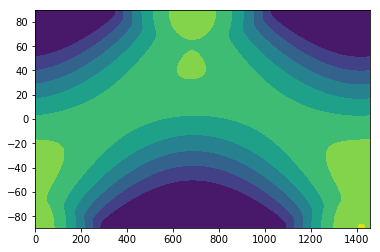

In [381]:
py.contourf(range(1460),lat,regrid3(swdn_toa3).mean(axis=-1))

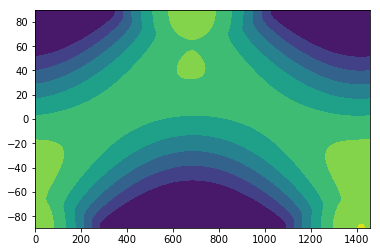

In [380]:
py.contourf(range(1460),lat,swdn_toa1.mean(axis=-1))

In [215]:
print swdn_toa3.shape
print precip3.shape

(43800, 3, 144)
(43800, 3, 144)


In [34]:
swdn_toa3.mean(axis=-1)[0:1460,...].shape

(1460, 3)

In [286]:
u3.shape

(43800, 24, 3, 144)

(-89.494385, 89.494385)

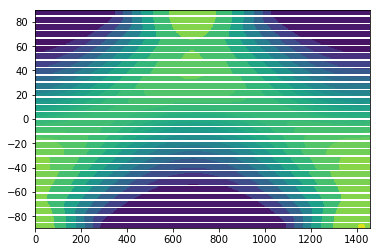

In [55]:
for i in range(30):
    py.contourf(range(1460),lat[3*i:3*(i+1)],swdn_toa3.mean(axis=-1)[1460*i:1460*(i+1),...].T, vmin=0, vmax=640)
    #print 1460*i
py.ylim(lat[0],lat[-1])    
# py.contourf(range(1460),lat[3:6],swdn_toa3.mean(axis=-1)[1460:1460*2,...].T)

In [301]:
u3[1460*i:1460*(i+1),...].transpose(2,0,1,3).shape

(3, 1460, 24, 144)

In [322]:
sw_app=[]
precip_app=[]
u_app=[]
for i in range(30):
    sw_app.append(swdn_toa3[1460*i:1460*(i+1),...].transpose(1,0,2))
    precip_app.append(precip3[1460*i:1460*(i+1),...].transpose(1,0,2))
    u_app.append(u3[1460*i:1460*(i+1),...].transpose(2,0,1,3))

In [328]:
print np.shape(sw_app)
print np.shape(swdn_toa1)
print np.shape(u3)

(90, 1460, 144)
(90, 1460, 144)
(43800, 24, 3, 144)


In [324]:
sw_app=np.reshape(np.array(sw_app), (30*3,1460,144))
precip_app=np.reshape(np.array(precip_app), (30*3,1460,144))
u_app=np.reshape(np.array(u_app), (30*3,1460,24,144))

In [317]:
np.shape(sw_app)

(90, 1460, 144)

In [304]:
np.shape(precip_app)

(30, 3, 1460, 144)

In [280]:
sw_app=np.reshape(np.array(sw_app), (30*3,1460))
precip_app=np.reshape(np.array(precip_app), (30*3,1460))

In [282]:
print precip_app.shape

(90, 1460)

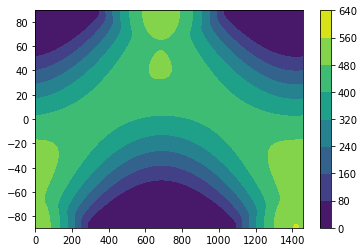

In [273]:
py.contourf(range(1460),lat,sw_app); py.colorbar()

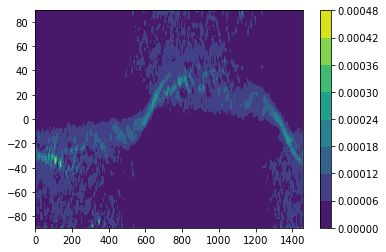

In [283]:
py.contourf(range(1460),lat,precip_app); py.colorbar()

(-89.494385, 89.494385)

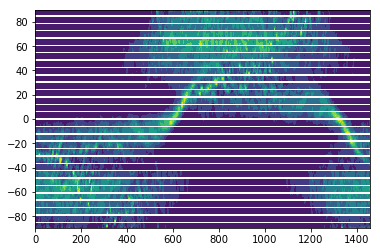

In [217]:
py.contourf(range(1460),lat,sw_app); py.colorbar()

In [ ]:
#precip3=v_var3.variables['precip'][:]

In [259]:
tsurf3=v_var3.variables['t_surf'][:]

In [260]:
tsurf1=v_var1.variables['t_surf'][:]

(-89.494385, 89.494385)

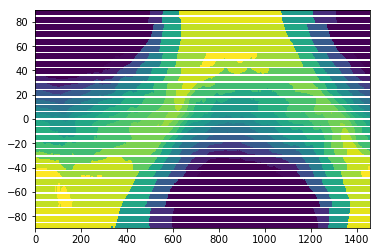

In [262]:
for i in range(30):
    py.contourf(range(1460),lat[3*i:3*(i+1)],tsurf.mean(axis=-1)[1460*i:1460*(i+1),...].T,vmin=264,vmax=312)
    #print 1460*i
py.ylim(lat[0],lat[-1])

In [ ]:
py.contourf(range(1460),lat,swdn_toa1.mean(axis=-1)); py.colorbar()

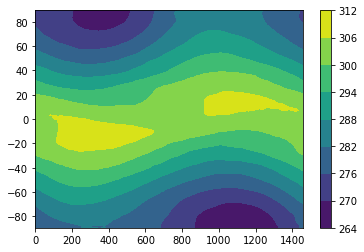

In [261]:
py.contourf(range(1460),lat,tsurf1.mean(axis=-1)); py.colorbar()

[85.955055 87.97753  89.494385]


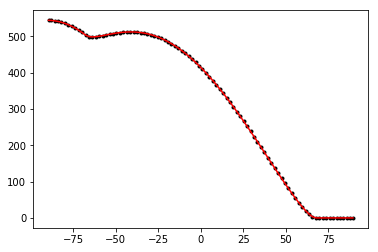

In [213]:
t=t+1

for i in range(0,30):
    if i==29:
        print lat[3*i:3*(i+1)]
    py.plot(lat[3*i:3*(i+1)],swdn_toa3.mean(axis=-1)[1460*i:1460*(i+1),...][t,:],'k.')
py.plot(lat[:],swdn_toa1.mean(axis=-1)[:,t],'r-')


[85.955055 87.97753  89.494385]


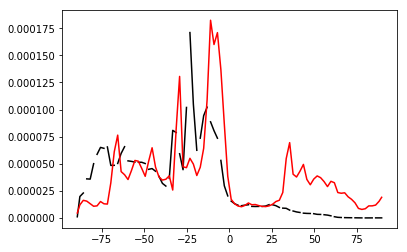

In [252]:
# t=t+1
t=t+10
for i in range(0,30):
    if i==29:
        print lat[3*i:3*(i+1)]
    py.plot(lat[3*i:3*(i+1)],precip3.mean(axis=-1)[1460*i:1460*(i+1),...][t,:],'k-')
py.plot(lat[:],precip1.mean(axis=-1)[:,t],'r-')


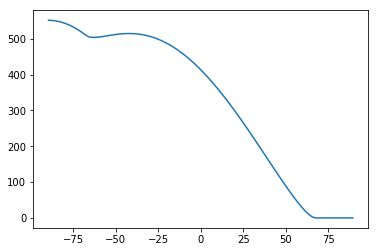

In [81]:
py.plot(lat[:],swdn_toa1.mean(axis=-1)[:,1])

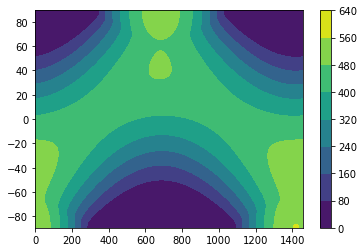

In [51]:
lat

array([-89.494385 , -87.97753  , -85.955055 , -83.93259  , -81.91011  ,
       -79.88764  , -77.865166 , -75.8427   , -73.82022  , -71.79775  ,
       -69.77528  , -67.75281  , -65.73034  , -63.707867 , -61.685394 ,
       -59.66292  , -57.64045  , -55.617977 , -53.595505 , -51.573032 ,
       -49.55056  , -47.52809  , -45.50562  , -43.483147 , -41.460674 ,
       -39.4382   , -37.41573  , -35.393257 , -33.370785 , -31.348314 ,
       -29.325842 , -27.303371 , -25.2809   , -23.258427 , -21.235954 ,
       -19.213484 , -17.191011 , -15.168539 , -13.146068 , -11.123595 ,
        -9.101124 ,  -7.078652 ,  -5.05618  ,  -3.0337079,  -1.011236 ,
         1.011236 ,   3.0337079,   5.05618  ,   7.078652 ,   9.101124 ,
        11.123595 ,  13.146068 ,  15.168539 ,  17.191011 ,  19.213484 ,
        21.235954 ,  23.258427 ,  25.2809   ,  27.303371 ,  29.325842 ,
        31.348314 ,  33.370785 ,  35.393257 ,  37.41573  ,  39.4382   ,
        41.460674 ,  43.483147 ,  45.50562  ,  47.52809  ,  49.5

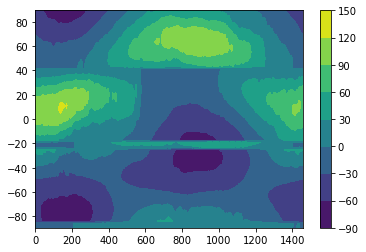

In [17]:
l=0
py.contourf(range(1460),lat,u2.mean(axis=-1)[:,l,:].T);py.colorbar()

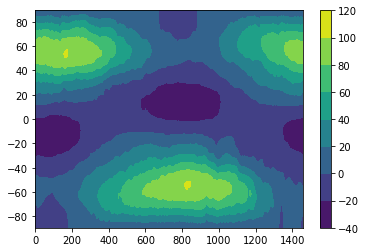

In [16]:
l=0
py.contourf(range(1460),lat,u1.mean(axis=-1)[:,l,:]);py.colorbar()